# AudioDataModule

In [1]:
import importlib
importlib.reload(importlib.import_module("src.dataModule"))
from src.dataModule import AudioDataModule
from transformers import AutoTokenizer
from transformers import WhisperTokenizer
from prep.processor import get_tokenizer

dm = AudioDataModule()
dm.setup("fit")
dm.setup("validate")
dm.setup("test")

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning_sdk/helpers.py:44: A newer version of lightning-sdk is available (0.1.15). Please consider upgrading with `pip install -U lightning-sdk`. Not all functionalities of the platform can be guaranteed to work with the current version.


# Batch

In [2]:
from tqdm.auto import tqdm
import time
import torch


start_time = time.time()
i= 0
for batch in tqdm(dm.train_dataloader()):
    x, x_len, y, y_len = batch
    # print("x")
    # print(x_len)
    # print("y")
    # print(y_len)
    # print(i)
    # i += 1
    pass

print("--- %s seconds ---" % (time.time() - start_time))

  0%|          | 0/313 [00:00<?, ?it/s]

--- 41.945616483688354 seconds ---


In [5]:
from tqdm import tqdm
import time
import torch
from prep.processor import get_tokenizer

tokenizer = get_tokenizer()

start_time = time.time()
for batch in tqdm(dm.train_dataloader()):
    x, x_len, y, y_len = batch
    for y_i, len_i in zip(y, y_len):
        decode = tokenizer.decode(y_i, skip_special_tokens=True)
        print(decode)
        print(len(decode))
        print(len_i)
    break


  0%|          | 0/1421 [00:00<?, ?it/s]

ואהבת את זה אהבתי את זה והייתי בשקיקה מחכה כל זה היה שבועי אז כל שבוע הייתי
75
tensor(77)
חשבתי רק ככה בשביל הצחוק המ ישלחו אחרי את הכדור
47
tensor(49)
וגמ יצאו בלי כלומ כמעט
22
tensor(24)
ליונה ופעמ לעפרה ובסופ אמרתי תעזבו אני
38
tensor(40)
למה אני מספרת את זה זה גמ כנ קרה אבל כאנ יש נקודה
49
tensor(51)
אנחנו גמ למדנו איזה שעתיימ ביומ את השפה הרומנית בבית הספר
57
tensor(59)
אז כשנכנסנו המ התנהגו יפה זה היה דנקשנ אביטה שיינ מכל הצדדימ
60
tensor(62)
וזה למד לדוד הבכור והדוד הבכור להדוד השני ואבא הרביעי קיבל
58
tensor(60)
אחר ככ או שנחזור הביתה והגרמנימ בודאי יפסידו את המלחמה או שנלכ לארצ ישראל בעזרת הגרמנימ וכו
91
tensor(93)
היא שכבה במקומ שהיה מאד שמור כי היא היתה חולה היא לא היתה יכולה לנשומ בכלל
74
tensor(76)
בטח חגגתמ
9
tensor(11)
מהחומר הזה הוא עשה לאמא שלי פודריה
34
tensor(36)
היה משהו נורא
13
tensor(15)
המ ניסו ניסו מאד
16
tensor(18)
בולגריה להשמדה
14
tensor(16)
אז
2
tensor(4)
היודנ פולציאי בוינה
19
tensor(21)
כל המ פחדו וגמ הבלוקובימ והפשטובימ כולמ פחדו מזה שיומ אחד ישלחו אותמ ג

  0%|          | 0/1421 [00:01<?, ?it/s]

זאת אומרת לצורכ חילול שבת והשפלה ולא לשומ צורכ אחר
50
tensor(52)
גמ המ עברו את כל המחנות
23
tensor(25)
אמא שלכ היא הלכה לבית ספר בולגרי
32
tensor(34)


  0%|          | 0/250 [00:00<?, ?it/s]

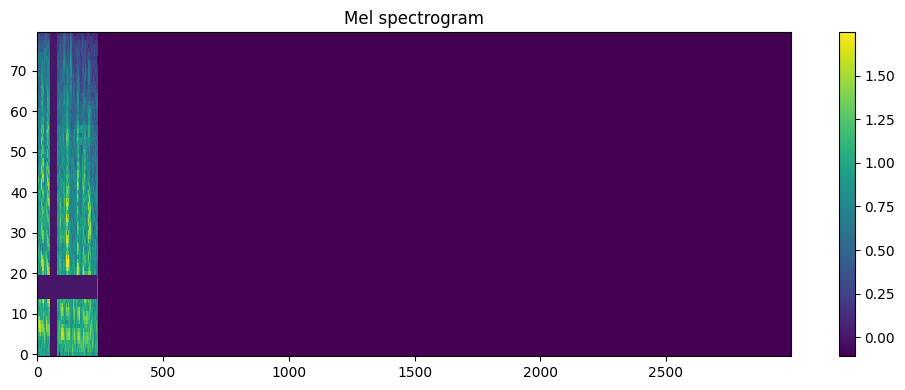

  0%|          | 0/250 [00:01<?, ?it/s]


In [ ]:
from tqdm import tqdm
import time
import torch
from prep.processor import get_tokenizer

tokenizer = get_tokenizer()

start_time = time.time()
for batch in tqdm(dm.train_dataloader()):
    x, x_len, y, y_len = batch
    # plot mel spectrogram
    import matplotlib.pyplot as plt
    import numpy as np
    x_i = x[0].numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(x_i, origin='lower', aspect='auto', interpolation='none')
    plt.colorbar()
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()
    break

---
# Test

In [ ]:
from datasets import load_dataset
dataset = load_dataset("google/fleurs", "he_il", split="test", cache_dir='datasets/test', trust_remote_code=True)
dataset = dataset.rename_column("transcription", "normalized_text")

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-100h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-100h")

Some weights of the model checkpoint at facebook/wav2vec2-base-100h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.mask_time_emb_vector']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-100h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav

In [ ]:
audio_sample = dataset[2]
inputs = processor(audio_sample["audio"]["array"], sampling_rate=audio_sample["audio"]["sampling_rate"], return_tensors="pt")

In [ ]:
x = inputs.input_values

with torch.no_grad():
  logits = model(x).logits

  

NameError: name 'inputs' is not defined

In [ ]:
from prep.processor import get_tokenizer
from charactertokenizer import CharacterTokenizer
from string import whitespace, punctuation
from hebrew.chars import HEBREW_CHARS
from transformers import WhisperFeatureExtractor
# tokenizer = get_tokenizer()


tokenizer = get_tokenizer()

example = "אוויר הרים צלול כיין וריח אורנים נישא ברוח הערביים עם קול פעמונים ובתרדמת אילן ואבן, שבויה בחלומה העיר אשר בדד יושבת ובליבה חומה ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור איכה יבשו בורות המים, כיכר השוק ריקה ואין פוקד את הר הבית בעיר העתיקה ובמערות אשר בסלע, מייללות רוחות ואין יורד אל ים המלח בדרך יריחו ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור אך בבואי היום לשיר לך ולך לקשור כתרים קטונתי מצעיר בנייך ומאחרון המשוררים כי שמך צורב את השפתיים, כנשיקת שרף אם אשכחך ירושלים, אשר כולה זהב ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור חזרנו אל בורות המים, לשוק ולכיכר שופר קורא בהר הבית, בעיר העתיקה ובמערות אשר בסלע, אלפי שמשות זורחות נשוב, נרד אל ים המלח בדרך יריחו ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור ירושלים של זהב ושל נחושת ושל אור הלא לכל שירייך, אני כינור כינור"
example2 = "אגא"

examples = [example, example2]

tokens = tokenizer(examples)["input_ids"]
print(tokens)

for token in tokens:
    decode=tokenizer.decode(token, skip_special_tokens=True)
    print(decode)
    print(len(decode))

[[0, 7, 12, 12, 16, 31, 34, 11, 31, 16, 21, 34, 28, 19, 12, 19, 34, 17, 16, 16, 23, 34, 12, 31, 16, 14, 34, 7, 12, 31, 22, 16, 21, 34, 22, 16, 32, 7, 34, 8, 31, 12, 14, 34, 11, 25, 31, 8, 16, 16, 21, 34, 25, 21, 34, 30, 12, 19, 34, 26, 25, 20, 12, 22, 16, 21, 34, 12, 8, 33, 31, 10, 20, 33, 34, 7, 16, 19, 23, 34, 12, 7, 8, 23, 35, 34, 32, 8, 12, 16, 11, 34, 8, 14, 19, 12, 20, 11, 34, 11, 25, 16, 31, 34, 7, 32, 31, 34, 8, 10, 10, 34, 16, 12, 32, 8, 33, 34, 12, 8, 19, 16, 8, 11, 34, 14, 12, 20, 11, 34, 16, 31, 12, 32, 19, 16, 21, 34, 32, 19, 34, 13, 11, 8, 34, 12, 32, 19, 34, 22, 14, 12, 32, 33, 34, 12, 32, 19, 34, 7, 12, 31, 34, 11, 19, 7, 34, 19, 17, 19, 34, 32, 16, 31, 16, 16, 18, 35, 34, 7, 22, 16, 34, 17, 16, 22, 12, 31, 34, 16, 31, 12, 32, 19, 16, 21, 34, 32, 19, 34, 13, 11, 8, 34, 12, 32, 19, 34, 22, 14, 12, 32, 33, 34, 12, 32, 19, 34, 7, 12, 31, 34, 11, 19, 7, 34, 19, 17, 19, 34, 32, 16, 31, 16, 16, 18, 35, 34, 7, 22, 16, 34, 17, 16, 22, 12, 31, 34, 7, 16, 17, 11, 34, 16, 8, 32, 1

In [ ]:
import torch

def decode(encoding):
    """
    normal decode function
    """
    text = tokenizer.decode(encoding, skip_special_tokens=True)
    return text

In [ ]:
print(decode([0,41]))

2


--
# LLM

In [ ]:
from transformers import BertModel, BertTokenizerFast, pipeline

tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
model = BertModel.from_pretrained('onlplab/alephbert-base')

sentiment_analysis = pipeline(
    task="token-classification",
    model="onlplab/alephbert-base",
    tokenizer="onlplab/alephbert-base",
)

print("\n\n")
print(sentiment_analysis('אני מתלבט מה לאכול לארוחת צהריים'))

Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of BertForTokenClassification were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.





[{'entity': 'LABEL_1', 'score': 0.71913487, 'index': 1, 'word': 'אני', 'start': 0, 'end': 3}, {'entity': 'LABEL_0', 'score': 0.520349, 'index': 2, 'word': 'מתלבט', 'start': 4, 'end': 9}, {'entity': 'LABEL_1', 'score': 0.56510997, 'index': 3, 'word': 'מה', 'start': 10, 'end': 12}, {'entity': 'LABEL_1', 'score': 0.73355114, 'index': 4, 'word': 'לאכול', 'start': 13, 'end': 18}, {'entity': 'LABEL_1', 'score': 0.6801301, 'index': 5, 'word': 'לארוחת', 'start': 19, 'end': 25}, {'entity': 'LABEL_1', 'score': 0.7803837, 'index': 6, 'word': 'צהריים', 'start': 26, 'end': 32}]


In [ ]:
from torchaudio.models.decoder import download_pretrained_files
import torch

files = download_pretrained_files("librispeech-4-gram")

print(files)

model = torch.load('/home/zeus/.cache/torch/hub/torchaudio/decoder-assets/librispeech-4-gram/lm.bin')

PretrainedFiles(lexicon='/home/zeus/.cache/torch/hub/torchaudio/decoder-assets/librispeech-4-gram/lexicon.txt', tokens='/home/zeus/.cache/torch/hub/torchaudio/decoder-assets/librispeech-4-gram/tokens.txt', lm='/home/zeus/.cache/torch/hub/torchaudio/decoder-assets/librispeech-4-gram/lm.bin')


/tmp/ipykernel_716738/4032573503.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/home/zeus/.cache/torch/hub/torchaudio/decoder-assets/librispeech-4-

UnpicklingError: invalid load key, 'm'.